In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#Imports the function to load environment variables from an `.env` file into the Python environment
from dotenv import load_dotenv

# Imports the built-in `os` module to access those environment variables using os.getenv()
import os



In [8]:
load_dotenv()

# Retrieves the PostgreSQL credentials from the `.env` file environment variable 
username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host     = os.getenv("DB_HOST")
port     = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

# Create the SQLAlchemy engine
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

# check if the connection works
with engine.connect() as connection:
    print("SQLAlchemy connected!")

SQLAlchemy connected!


In [9]:
owid_raw = pd.read_csv(r"C:\Users\Admin\project-data\owid-energy-data.csv")

In [10]:
pd.set_option('display.max_info_columns', 200)
owid_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 130 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    country                                       23195 non-null  object 
 1    year                                          23195 non-null  int64  
 2    iso_code                                      17099 non-null  object 
 3    population                                    18729 non-null  float64
 4    gdp                                           11780 non-null  float64
 5    biofuel_cons_change_pct                       2070 non-null   float64
 6    biofuel_cons_change_twh                       7903 non-null   float64
 7    biofuel_cons_per_capita                       6338 non-null   float64
 8    biofuel_consumption                           8057 non-null   float64
 9    biofuel_elec_per_capita                       57

In [11]:
pd.set_option('display.max_columns', None)


In [12]:
owid = owid_raw[owid_raw["country"].isin(['Nigeria', 'Ireland'])]

In [13]:
owid = owid.reset_index(drop=True)

In [14]:
owid

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Ireland,1900,IRL,4424108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ireland,1901,IRL,4408385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ireland,1902,IRL,4395829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,

In [15]:
owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 130 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    country                                       250 non-null    object 
 1    year                                          250 non-null    int64  
 2    iso_code                                      250 non-null    object 
 3    population                                    250 non-null    float64
 4    gdp                                           176 non-null    float64
 5    biofuel_cons_change_pct                       19 non-null     float64
 6    biofuel_cons_change_twh                       118 non-null    float64
 7    biofuel_cons_per_capita                       120 non-null    float64
 8    biofuel_consumption                           120 non-null    float64
 9    biofuel_elec_per_capita                       60 non

In [16]:
owid.isna().sum().sort_values()

country                               0
year                                  0
iso_code                              0
population                            0
gas_production                        8
                                   ... 
wind_cons_change_pct                218
other_renewables_cons_change_pct    222
biofuel_cons_change_pct             231
solar_cons_change_pct               235
nuclear_cons_change_pct             250
Length: 130, dtype: int64

In [17]:
num_cols = owid.select_dtypes(include=['float64', 'int64']).columns
owid[num_cols] = owid[num_cols].fillna(0)

In [18]:
owid.isna().sum().sort_values()

country                   0
year                      0
iso_code                  0
population                0
gdp                       0
                         ..
wind_elec_per_capita      0
wind_electricity          0
wind_energy_per_capita    0
wind_share_elec           0
wind_share_energy         0
Length: 130, dtype: int64

In [19]:
print("Countries in dataset:", owid['country'].unique())

Countries in dataset: ['Ireland' 'Nigeria']


In [20]:
print("Years range:", owid['year'].min(), "-", owid['year'].max())

Years range: 1900 - 2024


In [15]:
owid.to_sql("ng_energy", engine, index=False, if_exists="replace")

250

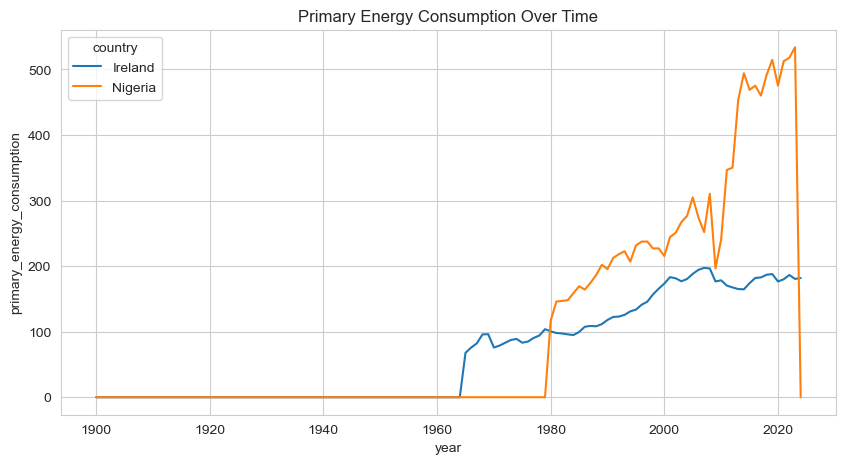

In [29]:
sns.set_style("whitegrid")

# Example 1: Primary energy consumption over time
plt.figure(figsize=(10,5))
sns.lineplot(data=owid, x='year', y='primary_energy_consumption', hue='country')
plt.title("Primary Energy Consumption Over Time")
plt.show()



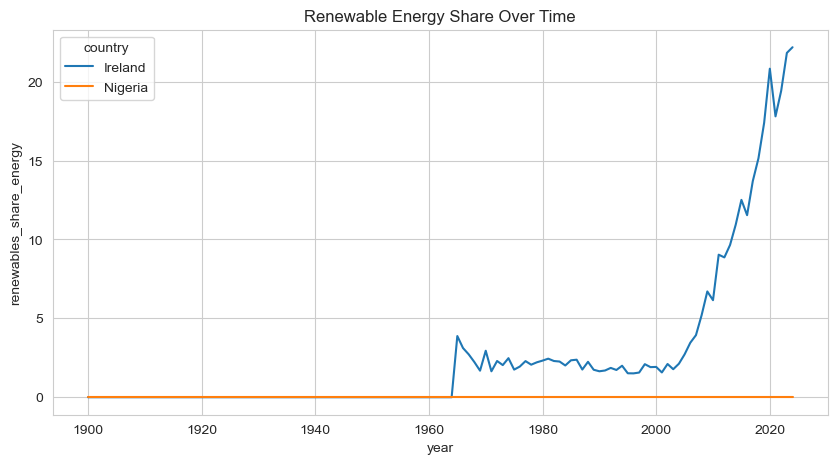

In [30]:
# Example 2: Renewables share trend
plt.figure(figsize=(10,5))
sns.lineplot(data=owid, x='year', y='renewables_share_energy', hue='country')
plt.title("Renewable Energy Share Over Time")
plt.show()

In [66]:
#owid.to_csv('clean_owid.csv', index=False)